In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import category_encoders as ce
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report
from mlxtend.plotting import plot_decision_regions
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

In [2]:
def train_validation_test_split(
    X, y, train_size = 0.8, val_size = 0.1, test_size = 0.1, 
    random_state = None, shuffle = True):
        
    assert train_size + val_size + test_size == 1
    
    X_train_val, X_test, y_train_val, y_test = train_test_split(
        X, y, test_size=test_size, random_state = random_state, shuffle = shuffle)
    
    X_train, X_val, y_train, y_val = train_test_split(
        X_train_val, y_train_val, test_size = val_size/(train_size + val_size), 
        random_state = random_state, shuffle = shuffle)
    
    return X_train, X_val, X_test, y_train, y_val, y_test

              precision    recall  f1-score   support

           0       0.96      0.92      0.94        48
           1       0.93      0.96      0.94        52

   micro avg       0.94      0.94      0.94       100
   macro avg       0.94      0.94      0.94       100
weighted avg       0.94      0.94      0.94       100

accuracy 0.94


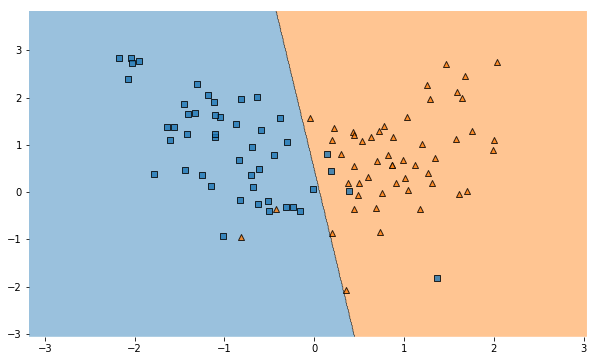

In [3]:
#1. Generate data

# Try re-running the cell with different values for these parameters
n_samples = 1000
weights = (0.50, 0.50)
class_sep = 0.8

X, y = make_classification(n_samples=n_samples, n_features=2, n_informative=2, 
                           n_redundant=0, n_repeated=0, n_classes=2, 
                           n_clusters_per_class=1, weights=weights, 
                           class_sep=class_sep, random_state=0)


# 2. Split data

# Uses our custom train_validation_test_split function
X_train, X_val, X_test, y_train, y_val, y_test = train_validation_test_split(
    X, y, train_size=0.8, val_size=0.1, test_size=0.1, random_state=1)


# 3. Fit model

# Try re-running the cell with different values for this parameter
class_weight = None

model = LogisticRegression(solver='lbfgs', class_weight=class_weight)
model.fit(X_train, y_train)


# 4. Evaluate model

y_pred = model.predict(X_val)
print(classification_report(y_val, y_pred))
print('accuracy', accuracy_score(y_val, y_pred))


# 5. Visualize decision regions

plt.figure(figsize=(10, 6))
plot_decision_regions(X_val, y_val, model, legend=0);

In [4]:
pd.DataFrame(X, columns=['Feature 1', 'Feature 2'])

,Feature 1,Feature 2
0,-0.200228,-1.126880
1,0.876102,0.980291
2,-0.722953,0.106167
3,0.697991,2.207370
4,1.306738,2.383626
5,2.031103,1.805274
6,1.175666,-0.057929
7,-0.534573,-0.764794
8,-0.791462,0.799571
9,-1.000704,1.285977


In [17]:
# read data file
arrests = pd.read_csv('Arrests.csv')

X = arrests.drop(columns = 'released')
y = arrests['released'] == 'yes'

arrests.head()

,Unnamed: 0,released,colour,year,age,sex,employed,citizen,checks
0,1,Yes,White,2002,21,Male,Yes,Yes,3
1,2,No,Black,1999,17,Male,Yes,Yes,3
2,3,Yes,White,2000,24,Male,Yes,Yes,3
3,4,No,Black,2000,46,Male,Yes,Yes,1
4,5,Yes,Black,1999,27,Female,Yes,Yes,1


In [18]:
arrests = arrests.drop(['Unnamed: 0'], axis = 1)
arrests = arrests.drop(['citizen'], axis = 1)
arrests.head()

,released,colour,year,age,sex,employed,checks
0,Yes,White,2002,21,Male,Yes,3
1,No,Black,1999,17,Male,Yes,3
2,Yes,White,2000,24,Male,Yes,3
3,No,Black,2000,46,Male,Yes,1
4,Yes,Black,1999,27,Female,Yes,1


In [19]:
# split data into train, validation, and test data
X_train, X_val, X_test, y_train, y_val, y_test = train_validation_test_split(
    X, y, shuffle = False)

# fit model
class_weight = None

model = LogisticRegression(solver = 'lbfgs', class_weight = class_weight)
model.fit(X_train, y_train)

ValueError: could not convert string to float: 'No'